In [1]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import xarray as xr
import numpy as np
import cmocean
from glob import glob
from tqdm import tqdm

Plot single slice

In [2]:
data = xr.open_dataset('test.nc')
data = data['analysed_sst'].sel(lat=slice(25,45), lon=slice(-85,-40)).isel(time=0)

FileNotFoundError: [Errno 2] No such file or directory: b'/home/theo/research/courses/12.843/lab3/test.nc'

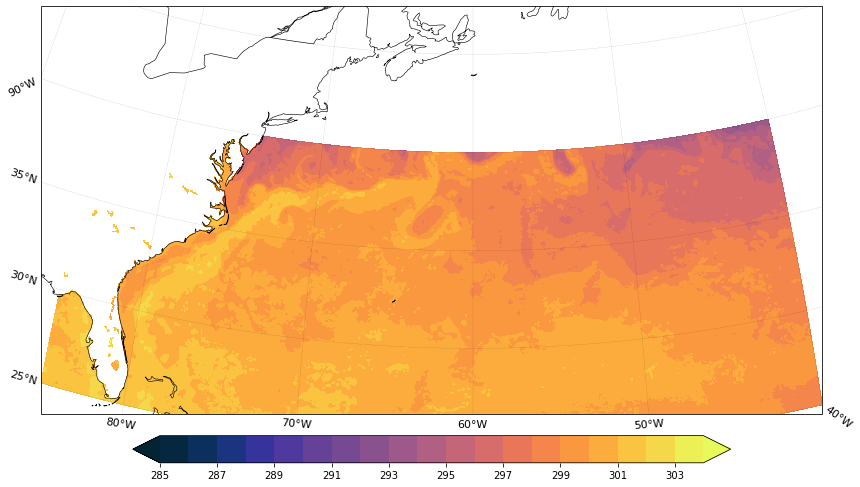

In [6]:
fig = plt.figure(figsize = (14,10))                                       
ax = plt.axes(projection=ccrs.Orthographic(central_longitude=300, 
                                           central_latitude=40)) # Use map background
ax.set_extent([275,320,25,45], crs=ccrs.PlateCarree())
ax.coastlines(linewidth=.6) 
ax.add_feature(cfeature.BORDERS, zorder=1, linewidth=.6)
gl = ax.gridlines(draw_labels=True, linestyle='--', alpha=.3, linewidth=.3, color='k', zorder=1.05)
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 11}
gl.ylabel_style = {'size': 11}
cp = ax.contourf(data.lon, data.lat, data, transform=ccrs.PlateCarree(), cmap='cmo.thermal',
                levels=np.arange(285,305,1), extend='both')
cb = fig.colorbar(cp,  orientation='horizontal', fraction=.05, pad=.04)

## load and plot multiple

In [3]:
data = xr.open_mfdataset(sorted(glob('mur-data/2021*.nc'))[:-2])['analysed_sst']
data.load() # load to memory

<xarray.DataArray 'analysed_sst' (time: 90, lat: 2002, lon: 4502)>
array([[[300.974  , 300.896  , 300.815  , ..., 297.63498, 297.632  ,
         297.628  ],
        [300.986  , 300.91098, 300.828  , ..., 297.664  , 297.659  ,
         297.65298],
        [300.992  , 300.915  , 300.828  , ..., 297.686  , 297.681  ,
         297.673  ],
        ...,
        [      nan,       nan,       nan, ..., 289.442  , 289.426  ,
         289.408  ],
        [      nan,       nan,       nan, ..., 289.43698, 289.41998,
         289.4    ],
        [      nan,       nan,       nan, ..., 289.431  , 289.412  ,
         289.391  ]],

       [[300.505  , 300.483  , 300.458  , ..., 297.50598, 297.507  ,
         297.50998],
        [300.479  , 300.465  , 300.447  , ..., 297.512  , 297.513  ,
         297.517  ],
        [300.453  , 300.448  , 300.438  , ..., 297.518  , 297.521  ,
         297.524  ],
...
        [      nan,       nan,       nan, ..., 293.835  , 293.824  ,
         293.814  ],
        [      nan,       nan,       nan, ..., 293.807  , 293.796  ,
         293.785  ],
        [      nan,       nan,       nan, ..., 293.77798, 293.767  ,
         293.75598]],

       [[302.35498, 302.33798, 302.32   , ..., 299.957  , 299.957  ,
         299.956  ],
        [302.361  , 302.344  , 302.326  , ..., 299.957  , 299.957  ,
         299.957  ],
        [302.367  , 302.35   , 302.332  , ..., 299.958  , 299.958  ,
         299.957  ],
        ...,
        [      nan,       nan,       nan, ..., 294.08798, 294.072  ,
         294.056  ],
        [      nan,       nan,       nan, ..., 294.033  , 294.016  ,
         294.     ],
        [      nan,       nan,       nan, ..., 293.977  , 293.96   ,
         293.943  ]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2021-06-01T09:00:00 ... 2021-08-29T09:00:00
  * lat      (lat) float32 24.99 25.0 25.01 25.02 ... 44.97 44.98 44.99 45.0
  * lon      (lon) float32 -85.0 -84.99 -84.98 -84.97 ... -40.01 -40.0 -39.99
Attributes:
    long_name:      analysed sea surface temperature
    standard_name:  sea_surface_foundation_temperature
    units:          kelvin
    valid_min:      -32767
    valid_max:      32767
    comment:        \"Final\" version using Multi-Resolution Variational Anal...
    source:         MODIS_T-JPL, MODIS_A-JPL, AMSR2-REMSS, AVHRRMTA_G-NAVO, A...

In [5]:
data.lat

<xarray.DataArray 'lat' (lat: 2002)>
array([24.99, 25.  , 25.01, ..., 44.98, 44.99, 45.  ], dtype=float32)
Coordinates:
  * lat      (lat) float32 24.99 25.0 25.01 25.02 ... 44.97 44.98 44.99 45.0
Attributes:
    long_name:      latitude
    standard_name:  latitude
    axis:           Y
    units:          degrees_north
    valid_min:      -90.0
    valid_max:      90.0
    comment:        geolocations inherited from the input data without correc...

In [4]:
data.lon

<xarray.DataArray 'lon' (lon: 4502)>
array([-85.  , -84.99, -84.98, ..., -40.01, -40.  , -39.99], dtype=float32)
Coordinates:
  * lon      (lon) float32 -85.0 -84.99 -84.98 -84.97 ... -40.01 -40.0 -39.99
Attributes:
    long_name:      longitude
    standard_name:  longitude
    axis:           X
    units:          degrees_east
    valid_min:      -180.0
    valid_max:      180.0
    comment:        geolocations inherited from the input data without correc...

In [9]:
def plot_time(x, ti, save=False):
    fig = plt.figure(figsize = (7,5))                                       
    ax = plt.axes(projection=ccrs.Orthographic(central_longitude=300, 
                                               central_latitude=40)) # Use map background
    ax.set_extent([280,318,25,43], crs=ccrs.PlateCarree())
    ax.coastlines(linewidth=.6) 
    ax.add_feature(cfeature.BORDERS, zorder=1, linewidth=.6)
    gl = ax.gridlines(draw_labels=True, linestyle='--', alpha=.3, linewidth=.3, color='k', zorder=1.05)
    gl.top_labels = False
    gl.right_labels = False
    gl.xlabel_style = {'size': 11}
    gl.ylabel_style = {'size': 11}
    cp = ax.contourf(x.lon, x.lat, x.isel(time=ti), 
                     transform=ccrs.PlateCarree(), cmap='cmo.thermal',
                    levels=np.arange(285,305,1), extend='both')
    mo = x.isel(time=ti).time.dt.month.values.item()
    da = x.isel(time=ti).time.dt.day.values.item()
    ax.set_title(f'2021-{mo:02d}-{da:02d}')
    cb = fig.colorbar(cp,  orientation='vertical', fraction=.022, pad=.03)
    if save:
        fig.savefig(f'figs/{ti:03d}.png', bbox_inches='tight')
        plt.close(fig)
    else:
        plt.show()

In [10]:
for ti in tqdm(range(len(data.time))):
    plot_time(data, ti, save=True)

100%|█████████████████████████████████████████████████████████████████████| 78/78 [28:13<00:00, 21.71s/it]
